# Human Resources Analytics
***

## Objective
***
*The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions. *

# Part 1: Obtendo os dados
***

In [12]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [13]:
#Read the analytics csv file and store our dataset in a dataframe called "df"
df = pd.DataFrame.from_csv('C:/Users/crrodr/Desktop/Tera - Data Science/Bases para exemplos-exercicios/Regressao_Logistica/RH/HR_comma_sep (1).csv', index_col=None)

In [14]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [15]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

# Selecionando variáveis mais importantes
***
**Summary:**

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee satisfaction, yearsAtCompany, and evaluation. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features. 

**Top 3 Features:**
1. Satisfaction
2. YearsAtCompany
3. Evaluation


In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

In [17]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [18]:
# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [19]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

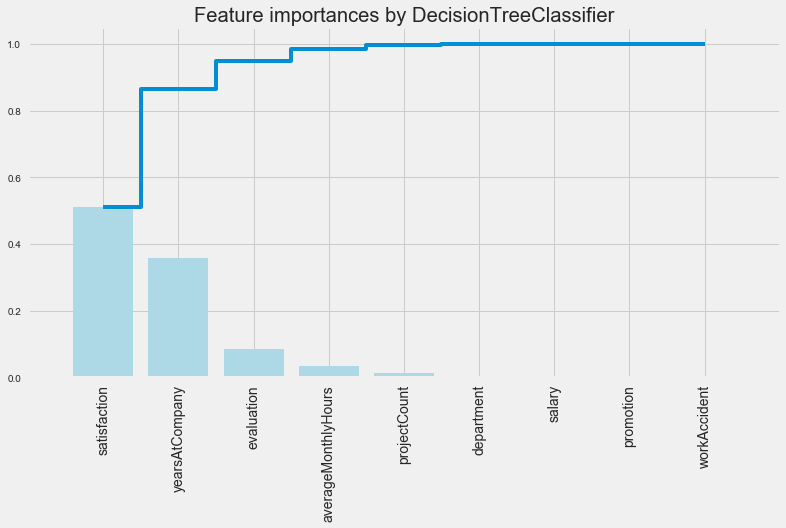

In [21]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()